# Plot for Summary Report: Milk Production after Calving

In [1]:
%run 'helpers-for-report-plot-generation.ipynb'

In [2]:
def retrieve_data():
    milk = get_dataset('milk_volume')
    birthdates = get_dataset('birthdates')[['animal_id', 'birthdate']]
    return milk, birthdates
milk, birthdates = retrieve_data()

In [3]:
milk = milk.set_index('date')['2016-01-01':'2017-12-31']

In [4]:
def append_cow_age_to_milk_dataframe(milk, birthdates):
    """ Adds a cows age in month for each day milked"""
    milk = milk.reset_index()
    milk = pd.merge(left=milk, right=birthdates, left_on='animal_id', right_on='animal_id')
    milk['months_aged'] = (milk['date'] - milk['birthdate']).astype('timedelta64[M]')
    return milk

In [5]:
milk_with_age = append_cow_age_to_milk_dataframe(milk, birthdates)

In [6]:
# Cows who are on their 1,2 lactations are assumed to be less than 36 months in age
aged_boolean_mask = milk_with_age['months_aged'] > 36
aged_cows = milk_with_age[aged_boolean_mask]
non_aged = milk_with_age[~aged_boolean_mask]

In [7]:
def plot_average_milk_volumes_after_calving(aged_cows, non_aged, title="", filename=""):
    fig, ax = plt.subplots(figsize=(15, 5))

    aged_cows = aged_cows.groupby('days_since_calving').mean().reset_index()
    aged_305_sum = aged_cows[aged_cows['days_since_calving'] <= 305]['milk_weight'].sum()
    print('Aged Cows - Average 305 Day Milk Yield: ', aged_305_sum)
    
    ax1 = sns.regplot(aged_cows['days_since_calving'], aged_cows['milk_weight'], marker='.', ax=ax)
    _ = plt.margins(0.03)
    _ = plt.xlabel('Days Since Calving')
    _ = plt.ylabel('Milk Pounds')

    non_aged = non_aged.groupby('days_since_calving').mean().reset_index()
    nonaged_305_sum = non_aged[non_aged['days_since_calving'] <= 305]['milk_weight'].sum()
    print('Non-Aged Cows - Average 305 Day Milk Yield: ', nonaged_305_sum)
    
    print('Percent Increase Aged over Non-Aged', (aged_305_sum - nonaged_305_sum) / nonaged_305_sum)
    
    
    ax2 = sns.regplot(non_aged['days_since_calving'], non_aged['milk_weight'], marker='.', ax=ax)
    _ = plt.margins(0.03)
    _ = plt.xlabel('Days Since Calving')
    _ = plt.ylabel('Milk Pounds Per Day')
    

    plt.legend(('3 or more Lactations', '1-2 Lactations'))
    plt.title(title)
    save_plot_for_summary_report(filename)
    plt.show()

Aged Cows - Average 305 Day Milk Yield:  23979.345129130208
Non-Aged Cows - Average 305 Day Milk Yield:  19960.312238683848
Percent Increase Aged over Non-Aged 0.2013512034474752


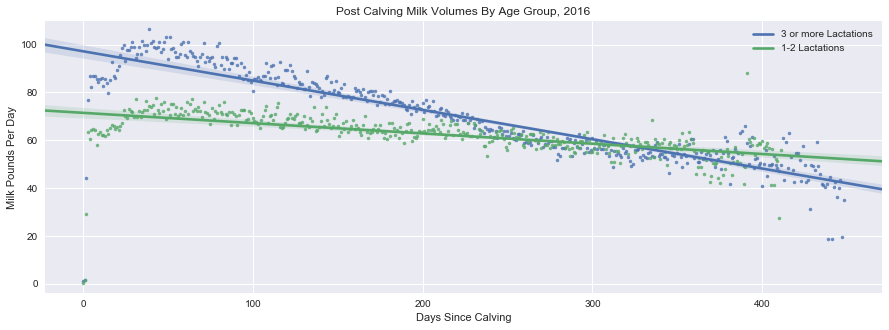

In [8]:
aged_2016 = aged_cows.set_index('date')['2016-01-01':'2016-12-31']
nonaged_2016 = non_aged.set_index('date')['2016-01-01':'2016-12-31']    
plot_average_milk_volumes_after_calving(aged_2016, 
                                        nonaged_2016, 
                                        'Post Calving Milk Volumes By Age Group, 2016',
                                       'post-calving-2016.png')

Aged Cows - Average 305 Day Milk Yield:  24906.9433779746
Non-Aged Cows - Average 305 Day Milk Yield:  21603.234953093328
Percent Increase Aged over Non-Aged 0.15292656086250728


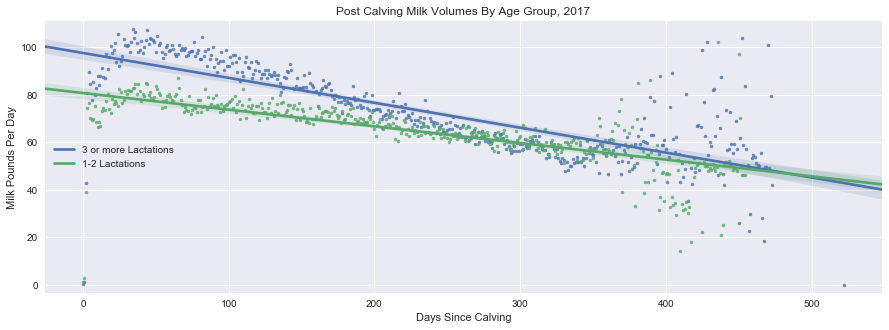

In [9]:
aged_2017 = aged_cows.set_index('date')['2017-01-01':'2017-12-31']
nonaged_2017 = non_aged.set_index('date')['2017-01-01':'2017-12-31']
plot_average_milk_volumes_after_calving(aged_2017, 
                                        nonaged_2017, 
                                        'Post Calving Milk Volumes By Age Group, 2017', 
                                        'post-calving-2017.png')

Aged Cows - Average 305 Day Milk Yield:  24413.16310524305
Non-Aged Cows - Average 305 Day Milk Yield:  20800.42639967341
Percent Increase Aged over Non-Aged 0.17368570413664028


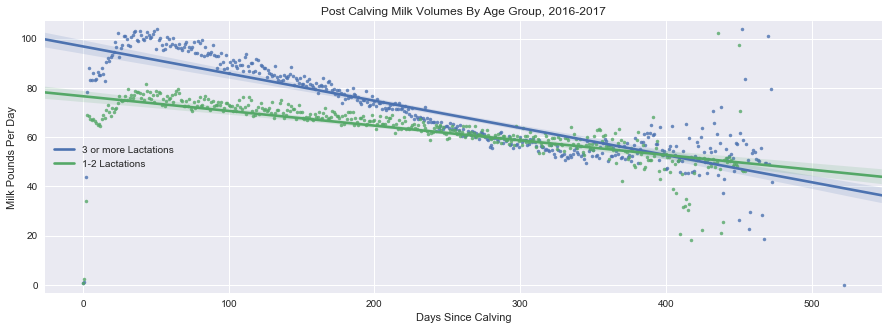

In [10]:
plot_average_milk_volumes_after_calving(aged_cows, 
                                        non_aged, 
                                        'Post Calving Milk Volumes By Age Group, 2016-2017',
                                        'post-calving-milk-2016-2017.png')